<a href="https://colab.research.google.com/github/CryptoRobotFr/easy_backtest/blob/main/review/_2EMA_%26_CCI_Scalping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.youtube.com/watch?v=D80KULtCbHw
#https://www.youtube.com/watch?v=CuWzDo72-Rk
#https://www.youtube.com/watch?v=L1yoKeQyP9M
#https://www.investopedia.com/terms/c/commoditychannelindex.asp

In [ ]:
!pip install python-binance ta

     |████████████████████████████████| 65 kB 2.8 MB/s 
     |████████████████████████████████| 288 kB 14.3 MB/s 
     |████████████████████████████████| 45 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 49.7 MB/s 
     |████████████████████████████████| 111 kB 45.0 MB/s 
     |████████████████████████████████| 271 kB 53.4 MB/s 
     |████████████████████████████████| 144 kB 66.7 MB/s 
     |████████████████████████████████| 94 kB 3.9 MB/s 
  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=e9d184c1b617065e523a46f17699458e1cfb95f404dc01e1f42d1f62e3424d9a
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta


<h1> Récupération des données à partir de Binance <h1>

In [ ]:
# Importation des librairies
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Variables pour les données
client = Client()
pair_symbol = "ETHUSDT"
time_interval = Client.KLINE_INTERVAL_5MINUTE
start_date = "01 january 2022"

# Récupération des données
klinesT = client.get_historical_klines(pair_symbol, time_interval, start_date)

# Créer un tableau grâce aux données
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])

# Supprime les colonnes inutiles
df.drop(columns = df.columns.difference(['timestamp','open','high','low','close','volume']), inplace=True)

# Convertit les colonnes en numéric
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

# Convertit les dates dans un format lisible
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']

# Affiche le tableau
df

,open,high,low,close,volume
timestamp,,,,,
2022-01-01 00:00:00,3676.22,3695.41,3676.22,3690.09,1363.4570
2022-01-01 00:05:00,3690.12,3705.90,3686.70,3696.55,862.5494
2022-01-01 00:10:00,3696.55,3699.81,3686.70,3691.90,753.5524
2022-01-01 00:15:00,3691.90,3693.35,3685.83,3689.51,438.4134
2022-01-01 00:20:00,3689.51,3699.58,3688.60,3699.45,372.5966
...,...,...,...,...,...
2022-04-10 11:20:00,3248.79,3250.33,3247.30,3250.33,984.1183
2022-04-10 11:25:00,3250.32,3250.33,3247.33,3247.97,420.7672
2022-04-10 11:30:00,3247.96,3250.00,3247.58,3247.59,251.8490


<h1> Définition des indicateurs <h1>

In [ ]:
# Ajout de nouvelle colonne dans le tableau représentant nos indicateurs

#---------EMA-----------
df['EMA10']=ta.trend.ema_indicator(close=df['close'], window=10)
df['EMA30']=ta.trend.ema_indicator(close=df['close'], window=30)


#--------CCI------------
#df['HLC3'] = (df['high'] +df['close'] + df['low'])/3

df['TP'] = (df['high'] + df['low'] + df['close']) / 3 
df['sma'] = df['TP'].rolling(40).mean()
df['mad'] = df['TP'].rolling(40).apply(lambda x: pd.Series(x).mad())
df['CCI'] = (df['TP'] - df['sma']) / (0.015 * df['mad']) 




# Affiche notre nouveau tableau
df[-20:]

,open,high,low,close,volume,EMA10,EMA30,TP,sma,mad,CCI
timestamp,,,,,,,,,,,
2022-04-10 10:05:00,3236.50,3241.93,3236.49,3239.51,526.9907,3238.746098,3241.083542,3239.310000,3242.464333,3.417333,-61.535960
2022-04-10 10:10:00,3239.52,3242.00,3239.09,3241.41,268.8188,3239.230444,3241.104604,3240.833333,3242.201417,3.227917,-28.255239
2022-04-10 10:15:00,3241.40,3244.60,3241.39,3244.60,520.8836,3240.206727,3241.330113,3243.530000,3242.017750,3.044250,33.117079
2022-04-10 10:20:00,3244.60,3244.60,3241.97,3242.52,281.6921,3240.627322,3241.406880,3243.030000,3241.891500,2.924092,25.956779
2022-04-10 10:25:00,3242.52,3242.52,3237.80,3238.01,317.9854,3240.151445,3241.187727,3239.443333,3241.694167,2.849167,-52.666472
2022-04-10 10:30:00,3238.01,3240.75,3235.12,3237.49,490.0986,3239.667546,3240.949164,3237.786667,3241.538667,2.881267,-86.813670
2022-04-10 10:35:00,3237.49,3240.10,3235.46,3238.71,277.4863,3239.493447,3240.804702,3238.090000,3241.397250,2.898142,-76.077486
2022-04-10 10:40:00,3238.70,3243.81,3238.70,3240.77,459.1512,3239.725547,3240.802463,3241.093333,3241.367000,2.878550,-6.338068
2022-04-10 10:45:00,3240.77,3244.54,3240.76,3244.00,279.3708,3240.502721,3241.008756,3243.100000,3241.382250,2.896088,39.541853


In [ ]:
dfTest = df.copy()
initial_wallet = 1000 # Somme d'usd au début de la stratégie
taker_fee = 0.0007 # ~ 0.07% de frais sur binance et ftx 

sl_price = 0
tp_price = 1000000

# Initalisation de notre portefeuille
wallet = initial_wallet
usd = initial_wallet
coin = 0

# Initialisation de nos tableaux qui vont contenir nos données d'analyse
trades_hitory = []
days_history = []
previous_day = 0
buy_ready = True

previous_row = df.iloc[0].copy()
#previous_row['close'] < max(row['SSB25'],row['SSA25']) and previous_row['close'] > min(row['SSB25'],row['SSA25']) and

def buy_condition(row, previous_row=None):
    if row['EMA10'] > row['EMA30'] and previous_row['close'] < row['EMA10'] and row['close'] > row['EMA10'] and row['CCI'] < 0 and row['CCI'] > -100 :
        return True
    else:
        return False    

def sell_condition(row, previous_row=None):
    if row['close'] >10000000 :
        return True
    else:
        return False  


# Simulation de notre stratégie en parcourant notre tableau ligne par ligne
for index, row in df.iterrows():

    # Garde en mémoire l'évolution de notre portefeuille chaque jour pour pouvoir analyser plus tard
    current_day = index.day
    if previous_day != current_day:
        temp_wallet = wallet
        if coin > 0:
            temp_wallet = coin*row['close']
        days_history.append({
            "day":str(index.year)+"-"+str(index.month)+"-"+str(index.day),
            "wallet":temp_wallet,
            "price":row['close']
        })
    previous_day = current_day

    # Vérifie les conditions si l'on doit acheter
    if buy_condition(row, previous_row) == True and usd > 0 and buy_ready == True:
        # Condition vérifiée, on achète à la clotûre
        coin = usd / row['close']           
        fee = taker_fee * coin             
        coin = coin - fee                   
        usd = 0                            
        wallet = coin * row['close']       
        # Ajout de données pour analyse future
        buy_data = {
            'date': index,
            'position': 'buy',
            'price': row['close'],
            'fee': fee * row['close'],
            'usd': usd,
            'coin': coin,
            'wallet': wallet,
            'reason': "market"
        }
        trades_hitory.append(buy_data)
        sl_price = min(previous_row['low'],row['low']) # A editer si l'on souhaite ajouter un sl
        tp_price = row['close'] + (row['close']-row['EMA30'])# A editer si l'on souhaite ajouter un tp


    elif row['low'] < sl_price and coin > 0:
        # On vend au prix du stop loss
        usd = coin * sl_price          
        fee = taker_fee * usd               
        usd = usd - fee                     
        coin = 0                           
        wallet = usd                      
        # Ajout de données pour analyse future
        sell_data = {
            'date': index,
            'position': 'sell',
            'price': sl_price,
            'fee': fee,
            'usd': usd,
            'coin': coin,
            'wallet': wallet,
            'reason': "stop loss"           
        }
        trades_hitory.append(sell_data) 
        # buy_ready = False # A commenter si l'on ne veut pas bloquer les prochains achats

    elif row['high'] > tp_price and coin > 0:
        # On vend au prix du stop loss
        usd = coin * tp_price          
        fee = taker_fee * usd               
        usd = usd - fee                     
        coin = 0                           
        wallet = usd                      
        # Ajout de données pour analyse future
        sell_data = {
            'date': index,
            'position': 'sell',
            'price': tp_price,
            'fee': fee,
            'usd': usd,
            'coin': coin,
            'wallet': wallet,
            'reason': "take profit"
                       
        }
        trades_hitory.append(sell_data) 
        # buy_ready = False # A commenter si l'on ne veut pas bloquer les prochains achats

    # Vérifie les conditions si l'on doit vendre
    elif sell_condition(row, previous_row) == True:
        buy_ready = True
        if coin > 0:
            # Condition vérifiée, on vend à la clotûre
            usd = coin * row['close']          
            fee = taker_fee * usd               
            usd = usd - fee                     
            coin = 0                           
            wallet = usd                      
            # Ajout de données pour analyse future
            sell_data = {
                'date': index,
                'position': 'sell',
                'price': row['close'],
                'fee': fee,
                'usd': usd,
                'coin': coin,
                'wallet': wallet,
                'reason': "market"           
            }
            trades_hitory.append(sell_data) 

    previous_row = row

# Convertit en tableau exploitable les données récupérer lors de la simulation
df_days = pd.DataFrame(days_history)
df_days['day'] = pd.to_datetime(df_days['day'])
df_days = df_days.set_index(df_days['day'])

df_trades = pd.DataFrame(trades_hitory)
df_trades['date'] = pd.to_datetime(df_trades['date'])
df_trades = df_trades.set_index(df_trades['date'])

Period: [2022-01-01 00:00:00] -> [2022-04-10 00:00:00]
Initial wallet: 1000.0 $

--- General Information ---
Final wallet: 878.84 $
Performance vs US dollar: -12.12 %
Worst Drawdown : -12.12%
Buy and hold performance: -11.78 %
Performance vs buy and hold: -0.39 %
Total trades on the period: 69
Global Win rate: 33.33 %
Average Profit: -0.12 %
Total fee: 90.87 $

Best trades: +0.21 % the 2022-01-31 20:45:00
Worst trades: -0.93 % the 2022-01-25 00:45:00

--- Plot wallet evolution vs asset ---


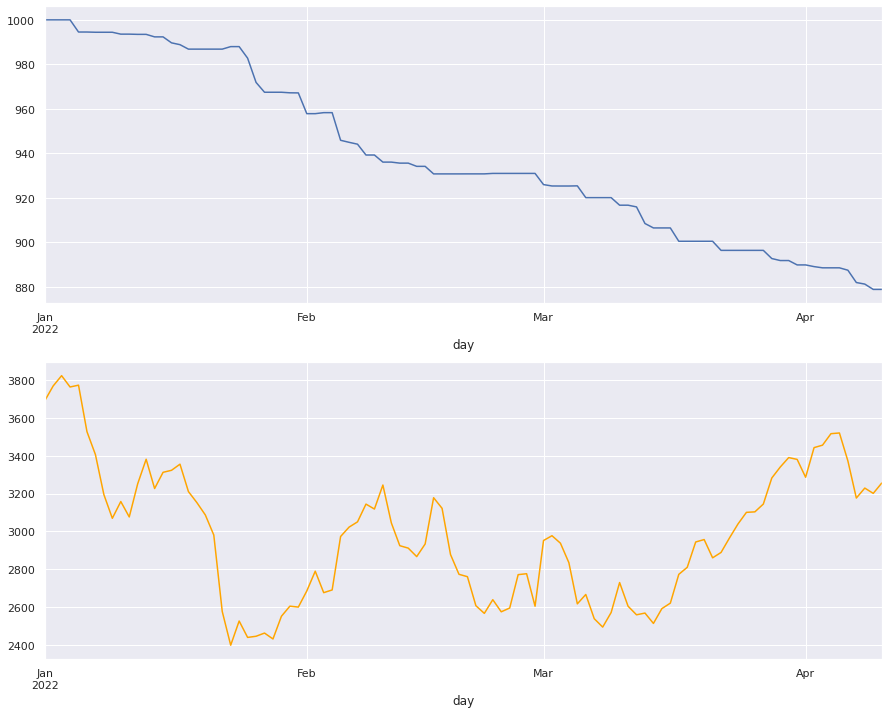

In [ ]:
def plot_bar_by_month(df_days):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    custom_palette = {}
    
    last_month = int(df_days.iloc[-1]['day'].month)
    last_year = int(df_days.iloc[-1]['day'].year)
    
    current_month = int(df_days.iloc[0]['day'].month)
    current_year = int(df_days.iloc[0]['day'].year)
    current_year_array = []
    while current_year != last_year or current_month-1 != last_month:
        date_string = str(current_year) + "-" + str(current_month)
        
        monthly_perf = (df_days.loc[date_string]['wallet'].iloc[-1] - df_days.loc[date_string]['wallet'].iloc[0]) / df_days.loc[date_string]['wallet'].iloc[0]
        monthly_row = {
            'date': str(datetime.date(1900, current_month, 1).strftime('%B')),
            'result': round(monthly_perf*100)
        }
        if monthly_row["result"] >= 0:
            custom_palette[str(datetime.date(1900, current_month, 1).strftime('%B'))] = 'g'
        else:
            custom_palette[str(datetime.date(1900, current_month, 1).strftime('%B'))] = 'r'
        current_year_array.append(monthly_row)
        # print(monthly_perf*100) 
        if ((current_month == 12) or (current_month == last_month and current_year == last_year)):
            current_df = pd.DataFrame(current_year_array)
            # print(current_df)
            g = sns.barplot(data=current_df,x='date',y='result', palette=custom_palette)
            for index, row in current_df.iterrows():
                if row.result >= 0:
                    g.text(row.name,row.result, '+'+str(round(row.result))+'%', color='black', ha="center", va="bottom")
                else:
                    g.text(row.name,row.result, '-'+str(round(row.result))+'%', color='black', ha="center", va="top")
            g.set_title(str(current_year) + ' performance in %')
            g.set(xlabel=current_year, ylabel='performance %')
            
            year_result = (df_days.loc[str(current_year)]['wallet'].iloc[-1] - df_days.loc[str(current_year)]['wallet'].iloc[0]) / df_days.loc[str(current_year)]['wallet'].iloc[0]
            print("----- " + str(current_year) +" Cumulative Performances: " + str(round(year_result*100,2)) + "% -----")
            plt.show()

            current_year_array = []
        
        current_month += 1
        if current_month > 12:
            current_month = 1
            current_year += 1

def plot_wallet_vs_asset(df_days):
    fig, axes = plt.subplots(figsize=(15, 12), nrows=2, ncols=1)
    df_days['wallet'].plot(ax=axes[0])
    df_days['price'].plot(ax=axes[1], color='orange')

def show_analys(days, trades):
    df_trades = trades.copy()
    df_days = days.copy()

    df_days['evolution'] = df_days['wallet'].diff()
    df_trades['trade_result'] = df_trades['wallet'].diff()
    df_trades['trade_result_pct'] = df_trades['wallet'].pct_change()

    df_days['wallet_ath'] = df_days['wallet'].cummax()
    df_days['drawdown'] = df_days['wallet_ath'] - df_days['wallet']
    df_days['drawdown_pct'] = df_days['drawdown'] / df_days['wallet_ath']

    initial_wallet = df_days.iloc[0]["wallet"]

    close_trades = df_trades.loc[df_trades['position'] == 'sell']
    good_trades = close_trades.loc[close_trades['trade_result_pct'] > 0]
    total_trades = len(close_trades)
    total_good_trades = len(good_trades)
    avg_profit = close_trades['trade_result_pct'].mean() 
    global_win_rate = total_good_trades / total_trades
    max_days_drawdown = df_days['drawdown_pct'].max()
    final_wallet = df_days.iloc[-1]['wallet']
    buy_and_hold_pct = (df_days.iloc[-1]['price'] - df_days.iloc[0]['price']) / df_days.iloc[0]['price']
    buy_and_hold_wallet = initial_wallet + initial_wallet * buy_and_hold_pct
    vs_hold_pct = (final_wallet - buy_and_hold_wallet)/buy_and_hold_wallet
    vs_usd_pct = (final_wallet - initial_wallet)/initial_wallet
    total_fee = df_trades['fee'].sum()

    best_trade = df_trades['trade_result_pct'].max()
    best_trade_date =  str(df_trades.loc[df_trades['trade_result_pct'] == best_trade].iloc[0]['date'])
    worst_trade = df_trades['trade_result_pct'].min()
    worst_trade_date =  str(df_trades.loc[df_trades['trade_result_pct'] == worst_trade].iloc[0]['date'])

    print("Period: [{}] -> [{}]".format(df_days.iloc[0]["day"], df_days.iloc[-1]["day"]))
    print("Initial wallet: {} $".format(round(initial_wallet,2)))

    print("\n--- General Information ---")
    print("Final wallet: {} $".format(round(final_wallet,2)))
    print("Performance vs US dollar: {} %".format(round(vs_usd_pct*100,2)))
    print("Worst Drawdown : -{}%".format(round(max_days_drawdown*100, 2)))
    print("Buy and hold performance: {} %".format(round(buy_and_hold_pct*100,2)))
    print("Performance vs buy and hold: {} %".format(round(vs_hold_pct*100,2)))
    print("Total trades on the period: {}".format(total_trades))
    print("Global Win rate: {} %".format(round(global_win_rate*100, 2)))
    print("Average Profit: {} %".format(round(avg_profit*100, 2)))
    print("Total fee: {} $".format(round(total_fee, 2)))

    print("\nBest trades: +{} % the {}".format(round(best_trade*100, 2), best_trade_date))
    print("Worst trades: {} % the {}".format(round(worst_trade*100, 2), worst_trade_date))

# Fonction pour afficher une analyse complète de la stratégie sur le passé
show_analys(df_days.loc[:], df_trades.loc[:])

print("\n--- Plot wallet evolution vs asset ---")
# Fonction pour afficher une analyse complète de la stratégie sur le passé
plot_wallet_vs_asset(df_days.loc[:])

In [ ]:
df_trades[-20:]

,date,position,price,fee,usd,coin,wallet,reason
date,,,,,,,,
2022-03-28 07:50:00,2022-03-28 07:50:00,buy,3319.930000,0.624903,0.000000,0.268709,892.093691,market
2022-03-28 07:55:00,2022-03-28 07:55:00,sell,3321.233200,0.624711,891.819161,0.000000,891.819161,take profit
2022-03-30 08:30:00,2022-03-30 08:30:00,buy,3402.570000,0.624273,0.000000,0.261918,891.194888,market
2022-03-30 08:35:00,2022-03-30 08:35:00,sell,3403.647323,0.624034,890.853024,0.000000,890.853024,take profit
2022-03-30 08:55:00,2022-03-30 08:55:00,buy,3403.210000,0.623597,0.000000,0.261585,890.229427,market
2022-03-30 09:00:00,2022-03-30 09:00:00,sell,3404.149777,0.623333,889.851926,0.000000,889.851926,take profit
2022-04-01 21:45:00,2022-04-01 21:45:00,buy,3455.370000,0.622896,0.000000,0.257347,889.229030,market
2022-04-01 21:50:00,2022-04-01 21:50:00,sell,3457.253646,0.622800,889.090981,0.000000,889.090981,take profit
2022-04-02 12:10:00,2022-04-02 12:10:00,buy,3489.970000,0.622364,0.000000,0.254578,888.468617,market


----- 2022 Cumulative Performances: -12.12% -----


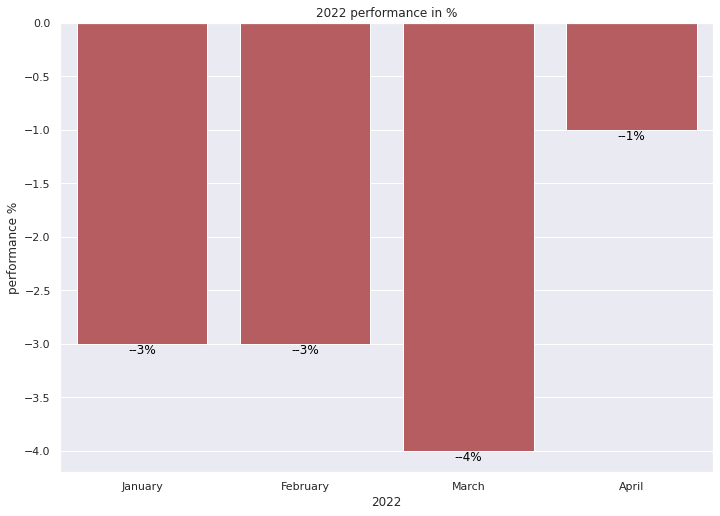

In [ ]:
# Fonction pour afficher les gains et les pertes mois par mois
plot_bar_by_month(df_days.loc[:])